<a href="https://colab.research.google.com/github/Allam0053/KK/blob/main/KK_tugas_1_nomor_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### soal
2. Download dataset UCI Machienary Wholesale+customers pada link berikut:
https://archive.ics.uci.edu/ml/datasets/Wholesale+customers
  - Lakukan penerapan metode clustering k-Means dan analisis jumlak k yang optimal
  - Lakukan penerapan metode clustering Hierarchical menggunakan pendekatan single
link, complete link, average link, dan ward.
  - Bandingkan hasil clustering pada poin 2a dan 2b menggunakan metode evaluasi
Silhouette.

In [76]:
# Import necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

import scipy.cluster.hierarchy as sch

In [77]:
import pandas as pd
 
#ubah file csv menjadi dataframe
df = pd.read_csv('/content/drive/MyDrive/KK/Wholesale-customers-data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


### 2.a

In [78]:
def myClusterFunc(df, k, SSE, score_maks):
    model = KMeans(n_clusters=k)
    kmeans = model.fit(df)
    score = silhouette_score(df, kmeans.labels_)
    if (score > score_maks[0]):
      score_maks[0] = score
    print("n_clusters k-Means=", k, "SSE value:", kmeans.inertia_,
          "Silhouette_score:", score)
    SSE.append(kmeans.inertia_)

n_clusters k-Means= 2 SSE value: 113217528878.79836 Silhouette_score: 0.5115333882980367
n_clusters k-Means= 3 SSE value: 80332414178.02908 Silhouette_score: 0.4783511411368133
n_clusters k-Means= 4 SSE value: 64881342317.65967 Silhouette_score: 0.3901291340789497
n_clusters k-Means= 5 SSE value: 53091562765.51761 Silhouette_score: 0.3634715540384712
n_clusters k-Means= 6 SSE value: 46919446276.772224 Silhouette_score: 0.37880387211372446
n_clusters k-Means= 7 SSE value: 41232579199.20799 Silhouette_score: 0.34276781735560075
n_clusters k-Means= 8 SSE value: 36016968629.35569 Silhouette_score: 0.3273711348101747
n_clusters k-Means= 9 SSE value: 32884435376.046524 Silhouette_score: 0.30636829009440875


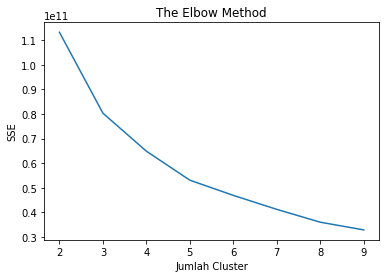

In [79]:
cluster_range = range(2, 10)

SSE = []
score_maks = [0]

for k in cluster_range:
    myClusterFunc(df, k, SSE, score_maks)
kmeans_score = score_maks[0]

plt.plot(cluster_range, SSE)

plt.xlabel('Jumlah Cluster')
plt.ylabel('SSE')
plt.title('The Elbow Method')

plt.show()

### 2.b

In [80]:
def showDendo(judul, method, data):
  plt.title(judul)
  ward_dendogram = sch.dendrogram(sch.linkage(data, method=method))
  plt.show()

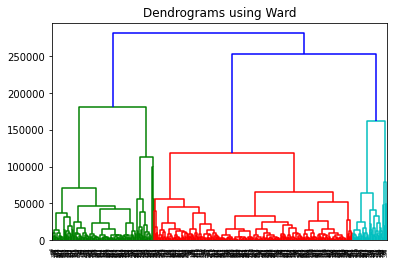

Silhouette_score: 0.3447187623823024


In [81]:
n_clusters = 2

# Hirarchical Clustering menggunakan pendekatan ward
showDendo(judul="Dendrograms using Ward", method='ward', data=df)

hc_ward = AgglomerativeClustering(
            n_clusters=n_clusters, 
            affinity='euclidean', 
            linkage='ward')
y_hc_ward = hc_ward.fit_predict(df)

ward_score = silhouette_score(df, y_hc_ward)
print("Silhouette_score:", ward_score)

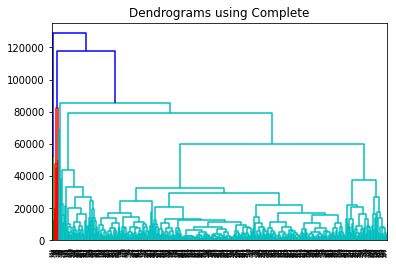

Silhouette_score: 0.7275938818770178


In [82]:
# Hirarchical Clustering menggunakan pendekatan complete link
showDendo(judul="Dendrograms using Complete", method='complete', data=df)

hc_complete = AgglomerativeClustering(
    n_clusters=n_clusters, affinity='euclidean', linkage='complete')
y_hc_complete = hc_complete.fit_predict(df)

complete_score = silhouette_score(df, y_hc_complete)
print("Silhouette_score:", complete_score)

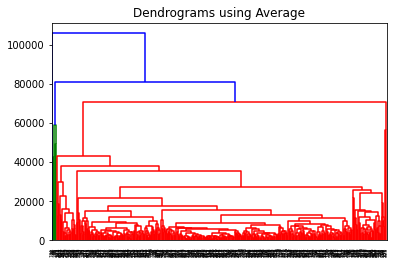

Silhouette_score:


In [83]:
# Hirarchical Clustering menggunakan pendekatan average link
showDendo(judul="Dendrograms using Average", method='average', data=df)

hc_average = AgglomerativeClustering(
    n_clusters=n_clusters, affinity='euclidean', linkage='average')
y_hc_average = hc_average.fit_predict(df)

average_score = silhouette_score(df, y_hc_average)
print("Silhouette_score:", )

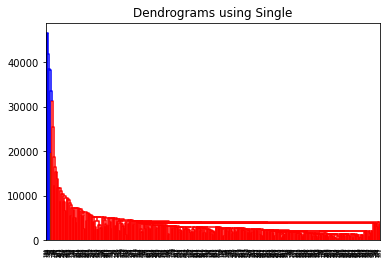

Silhouette_score: 0.7957467756794632


In [84]:
# Hirarchical Clustering menggunakan pendekatan single link
showDendo(judul="Dendrograms using Single", method='single', data=df)

hc_single = AgglomerativeClustering(
    n_clusters=n_clusters, affinity='euclidean', linkage='single')
y_hc_single = hc_single.fit_predict(df)

single_score = silhouette_score(df, y_hc_single)
print("Silhouette_score:", silhouette_score(df, y_hc_single))

### 2.c

In [85]:
x = [kmeans_score,
      ward_score,
      complete_score,
      average_score,
      single_score]

y = ['k-means score',
      'agglo_ward score',
      'agglo_complete score',
      'agglo_average score',
      'agglo_single score']

scores = pd.DataFrame(data={'Jenis Metode': y, 'Score': x})

In [86]:
display(scores)

,Jenis Metode,Score
0,k-means score,0.511533
1,agglo_ward score,0.344719
2,agglo_complete score,0.727594
3,agglo_average score,0.795747
4,agglo_single score,0.795747


Didapat kesimpulan bahwa berdasarkan silhouette score, metode hierarchical clustering lebih unggul dari  k mean.